#Dataset used is images of sign language

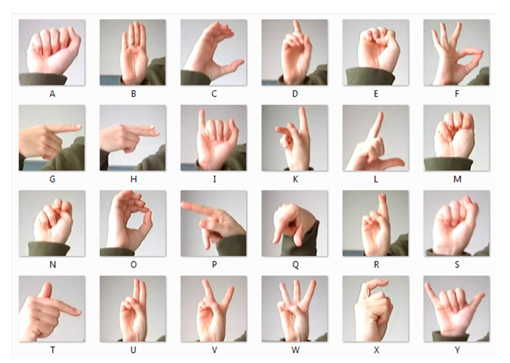

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.128s...
[t-SNE] Computed neighbors for 10000 samples in 9.547s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.925906
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.482674
[t-SNE] KL divergence after 1000 iterations: 1.681760


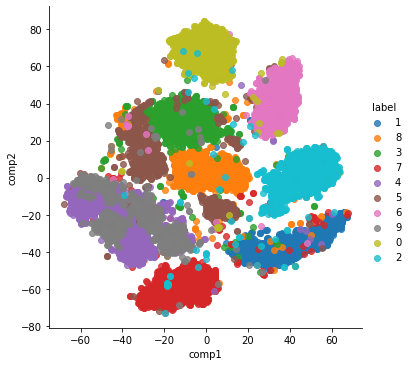

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
# get mnist data
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0
y = mnist.target 
# first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X) 
# randomly sample data to run quickly
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000 
# reduce dimensionality with t-sne
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
# visualize
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [3]:
print(y.reshape(70000,1))
y1=y.reshape(70000,1)
#print(y1.shape)
#print(X_pca[:,0])
X_pca_updated = np.vstack((X_pca[:,0],X_pca[:,1], y)).T
dataframe = pd.DataFrame(data=X_pca_updated)
dataframe.columns =['PC1', 'PC2', 'label'] 
#print(dataframe.head())
#print(dataframe['PC1'])

[['5']
 ['0']
 ['4']
 ...
 ['4']
 ['5']
 ['6']]


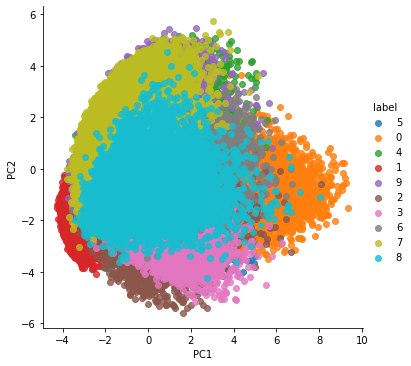

In [4]:
sns.lmplot(x='PC1', y='PC2', data=dataframe, hue='label', fit_reg=False)

In [5]:
from sklearn.datasets import make_swiss_roll
X,t = make_swiss_roll(n_samples=1000,noise=0.2,random_state=42)

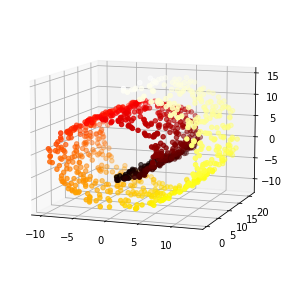

In [6]:
axis=[-11.5,14,-2,23,-12,15]
fig=plt.figure(figsize=(6,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=t,cmap=plt.cm.hot)
ax.view_init(10,-70)